In [72]:
##Week 1 : HW 1 Solution 
##ID:2018028

In [73]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [74]:
image = cv2.imread('/kaggle/input/healthy-and-bleached-corals-image-classification/healthy_corals/1007788673_ced6bb5451_o.jpg',cv2.IMREAD_GRAYSCALE)
image.shape

(240, 300)

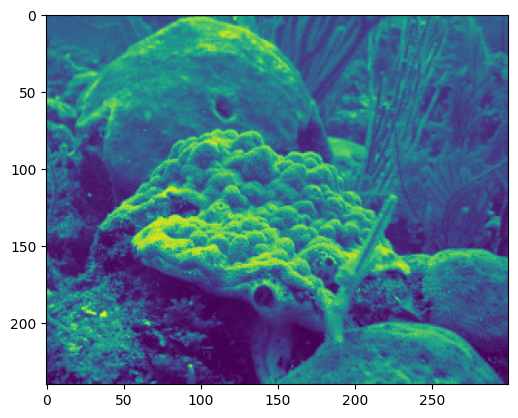

In [75]:
plt.imshow(image)

In [76]:
## import matplotlib.pyplot as plt
import glob
import librosa
import numpy as np
import cv2 
bleached_corals = glob.glob('/kaggle/input/healthy-and-bleached-corals-image-classification/bleached_corals/*.jpg')
healthy_corals = glob.glob('/kaggle/input/healthy-and-bleached-corals-image-classification/healthy_corals/*.jpg')

data = []
labels = []

image_size=(32, 32)

for i in bleached_corals:   
    image = cv2.imread(i,cv2.IMREAD_GRAYSCALE)
    # Resize the image
    image = cv2.resize(image, image_size)

    data.append(image)
    labels.append(0)

for i in healthy_corals:   
    image = cv2.imread(i,cv2.IMREAD_GRAYSCALE)
    # Resize the image
    image = cv2.resize(image, image_size)

    data.append(image)
    labels.append(1)
    
    
X=np.array(data)
y=np.array(labels)
y.shape

(922,)

In [77]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [135]:
# Build the MLP model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2) ,
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(0.2) ,
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dropout(0.2) ,
    tf.keras.layers.Dense(units=16, activation='relu'),
    
    tf.keras.layers.Dense(units=2, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_58"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_58 (Flatten)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_31               │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_44 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_454 (Dense)                    │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_45 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_455 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_46 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_456 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_457 (Dense)                    │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 72,338 (282.57 KB)

 Trainable params: 70,290 (274.57 KB)

 Non-trainable params: 2,048 (8.00 KB)

Epoch 1/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5174 - loss: 0.8015 - val_accuracy: 0.5135 - val_loss: 0.8239 - learning_rate: 0.0010
Epoch 2/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5855 - loss: 0.7112 - val_accuracy: 0.6419 - val_loss: 0.6436 - learning_rate: 0.0010
Epoch 3/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5601 - loss: 0.6976 - val_accuracy: 0.6486 - val_loss: 0.6400 - learning_rate: 0.0010
Epoch 4/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5806 - loss: 0.6495 - val_accuracy: 0.6554 - val_loss: 0.6396 - learning_rate: 0.0010
Epoch 5/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6158 - loss: 0.6429 - val_accuracy: 0.6081 - val_loss: 0.6127 - learning_rate: 0.0010
Epoch 6/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6447 - loss: 0.6043 - val_accuracy: 0.6757 - val_loss: 0.5937 - learning_rate: 0.0010
Epoch 7/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5937 - loss: 0.

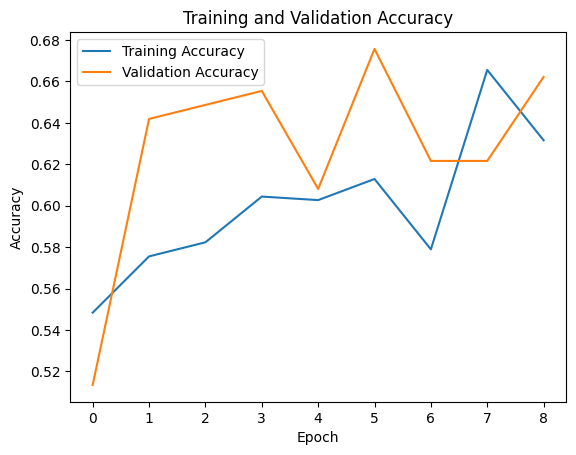

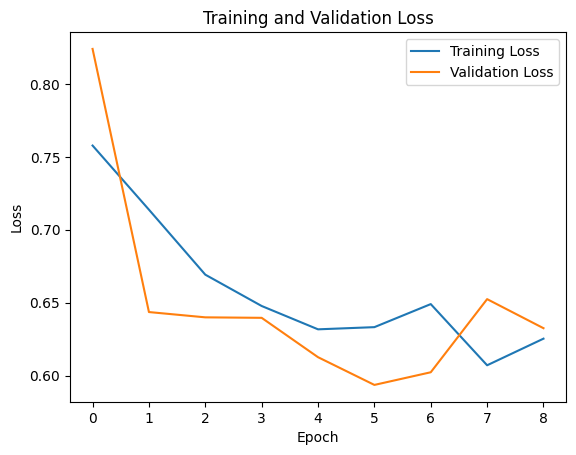

In [136]:
# Train the model

lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',    # Monitor validation loss for learning rate reduction
    factor=0.5,            # Reduce learning rate by a factor
    patience=5,            # Number of epochs with no improvement after which learning rate will be reduced
    min_lr=1e-6            # Minimum learning rate
)

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3,min_delta=1e-11)

history=model.fit(X_train, y_train,validation_data=(X_val, y_val),epochs=100, batch_size=4,callbacks=[early_stopping_callback,lr_callback])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [137]:
# Make predictions on new images
predictions = model.predict(X_test[:10])

predicted_classes = np.argmax(predictions, axis=1)

# Print the predicted class and corresponding true class
for i in range(len(predicted_classes)):
    print(f"Predicted class: {predicted_classes[i]}, True class: {y_test[i]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Predicted class: 0, True class: 0
Predicted class: 0, True class: 0
Predicted class: 1, True class: 1
Predicted class: 1, True class: 0
Predicted class: 0, True class: 1
Predicted class: 0, True class: 0
Predicted class: 1, True class: 1
Predicted class: 0, True class: 1
Predicted class: 0, True class: 1
Predicted class: 0, True class: 0


**Optimize the model to get at least 70% accuracy on validation set. Some suggestions -** 
1.   Dynamic learning rate
2.   Save model 
3.   Early stopping 
4.   Drop-Out** 
**for getting higher accuracy**


# **********Ar Partesina improve korte**# **